<a href="https://colab.research.google.com/github/Nitishkumar2026/-Mall_Customer_Analysis/blob/main/Mall_Customer_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA



In [4]:
# Step 2: Load Dataset
df = pd.read_csv('/content/Mall_Customers.csv')




In [6]:
# Step 3: Basic EDA
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())



Dataset Shape: (200, 5)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

Summary Statistics:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.5000

In [8]:
# Step 4: Check for Missing Values
print("\nMissing Values:\n", df.isnull().sum())




Missing Values:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


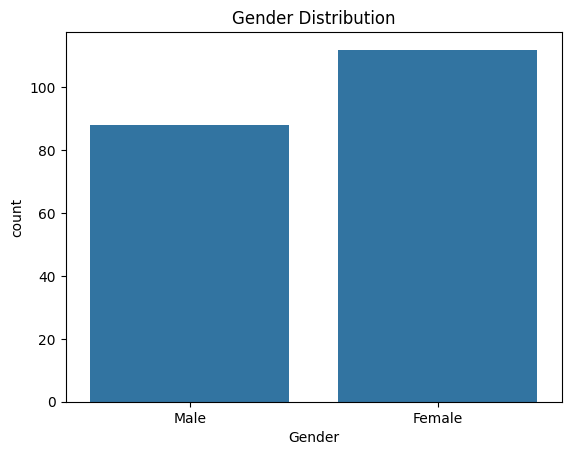

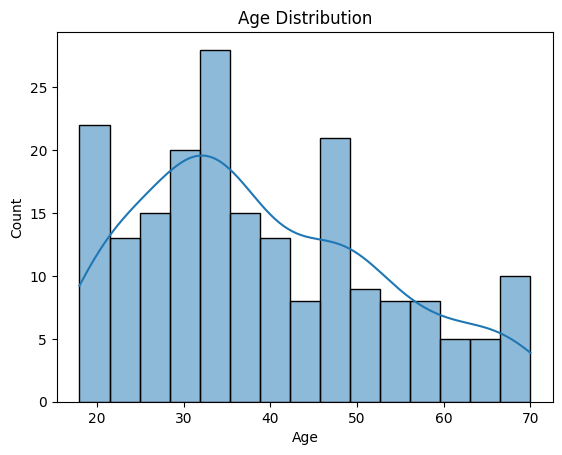

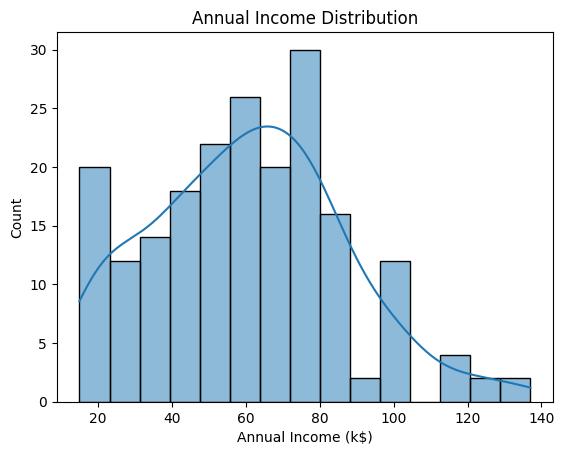

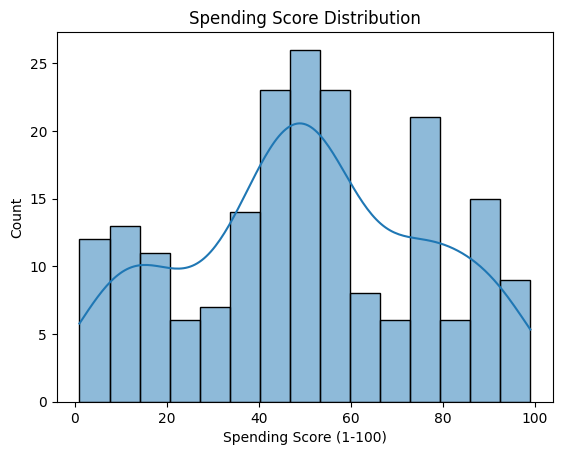

In [10]:
# Step 5: Visualizations
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

sns.histplot(df['Age'], bins=15, kde=True)
plt.title('Age Distribution')
plt.show()

sns.histplot(df['Annual Income (k$)'], bins=15, kde=True)
plt.title('Annual Income Distribution')
plt.show()

sns.histplot(df['Spending Score (1-100)'], bins=15, kde=True)
plt.title('Spending Score Distribution')
plt.show()



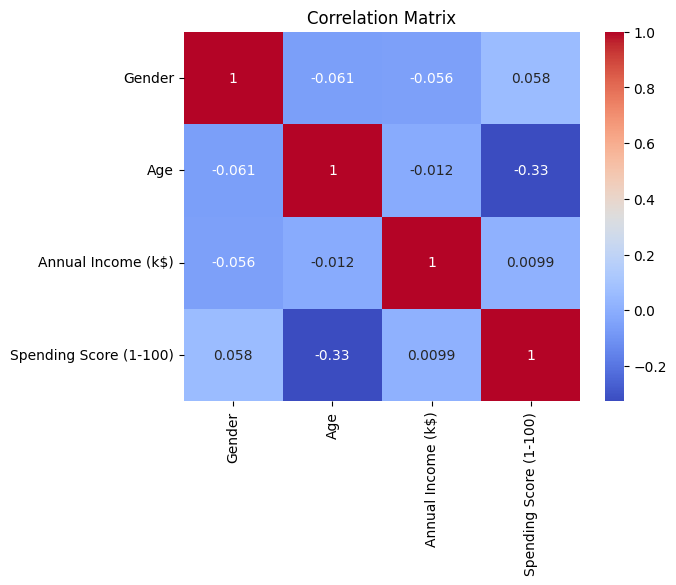

In [12]:
# Step 6: Correlation Analysis
df_corr = df.copy()
df_corr['Gender'] = df_corr['Gender'].map({'Male': 0, 'Female': 1})
corr = df_corr.drop(columns='CustomerID').corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



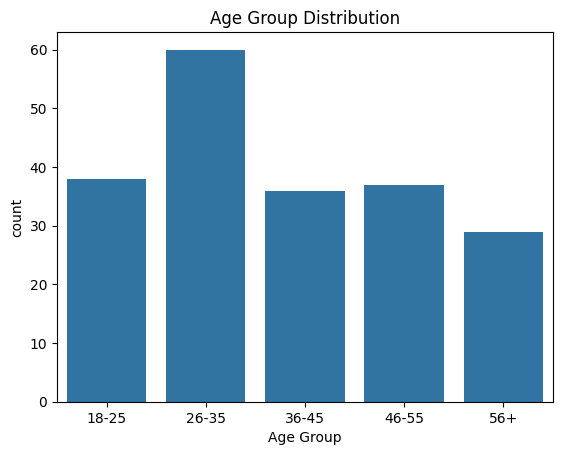

In [14]:
# Step 7: Age Group Analysis
df['Age Group'] = pd.cut(df['Age'], bins=[17, 25, 35, 45, 55, 70],
                         labels=['18-25', '26-35', '36-45', '46-55', '56+'])

sns.countplot(x='Age Group', data=df)
plt.title('Age Group Distribution')
plt.show()



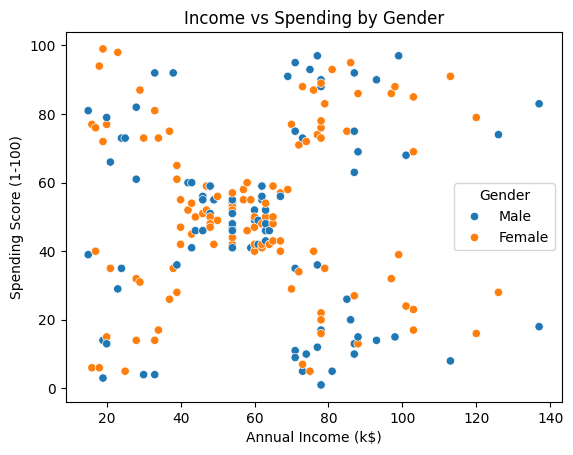

In [16]:
# Step 8: Scatterplot of Income vs Spending
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender')
plt.title('Income vs Spending by Gender')
plt.show()



In [18]:
# Step 9: Preprocessing for Clustering
df_cluster = df.drop(columns=['CustomerID', 'Age Group'])
df_cluster['Gender'] = df_cluster['Gender'].map({'Male': 0, 'Female': 1})

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cluster)



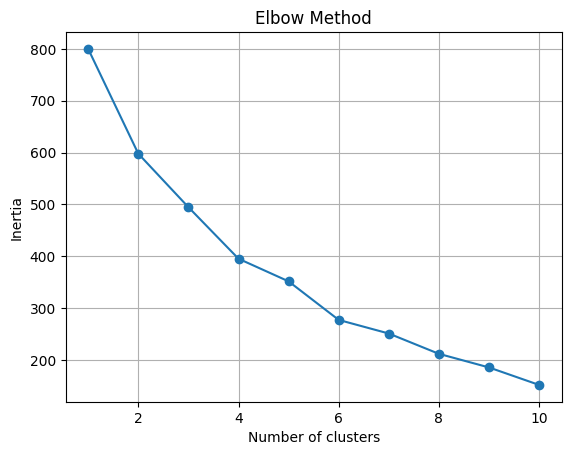

In [20]:
# Step 10: Elbow Method to Find Optimal K
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()



In [22]:
# Step 11: Apply KMeans with k=5 (assumed optimal from elbow curve)
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(scaled_data)
df['Cluster'] = clusters



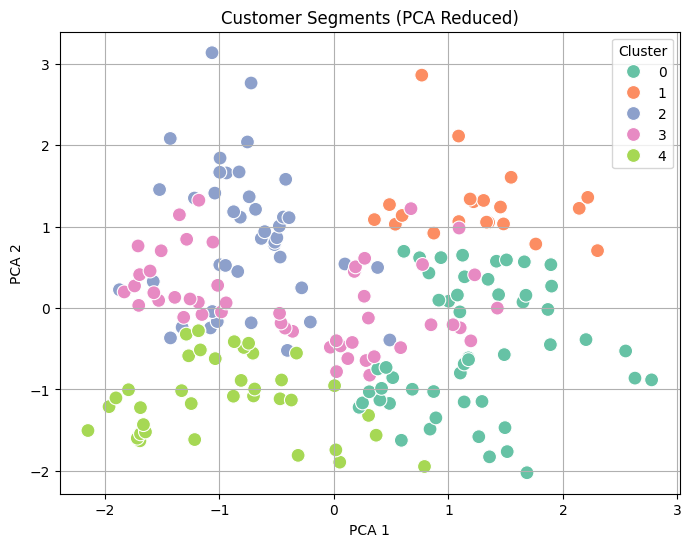

In [24]:
# Step 12: PCA for 2D Visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=clusters, palette='Set2', s=100)
plt.title('Customer Segments (PCA Reduced)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()



In [27]:
# Step 13: Cluster Analysis
# Select only numeric columns to avoid issues with non-numeric data like 'Gender' or 'Age Group'
numeric_cols = df.select_dtypes(include=[np.number]).columns
cluster_summary = df.groupby('Cluster')[numeric_cols].mean()
print("Cluster Summary:\n", cluster_summary)




Cluster Summary:
          CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \
Cluster                                                                      
0         65.333333  56.470588           46.098039               39.313725   
1        159.500000  39.500000           85.150000               14.050000   
2        100.809524  28.690476           60.904762               70.238095   
3        151.510204  37.897959           82.122449               54.448980   
4         50.526316  27.315789           38.842105               56.210526   

         Cluster  
Cluster           
0            0.0  
1            1.0  
2            2.0  
3            3.0  
4            4.0  


<ipython-input-29-3384f35081cf>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=df, palette='Set2')


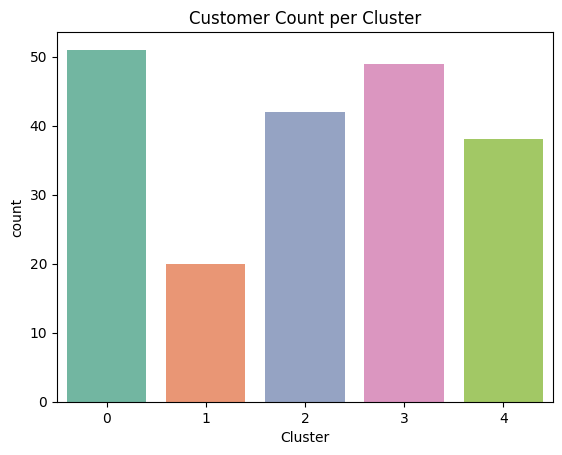

In [29]:
# Step 14: Cluster Distribution
sns.countplot(x='Cluster', data=df, palette='Set2')
plt.title("Customer Count per Cluster")
plt.show()

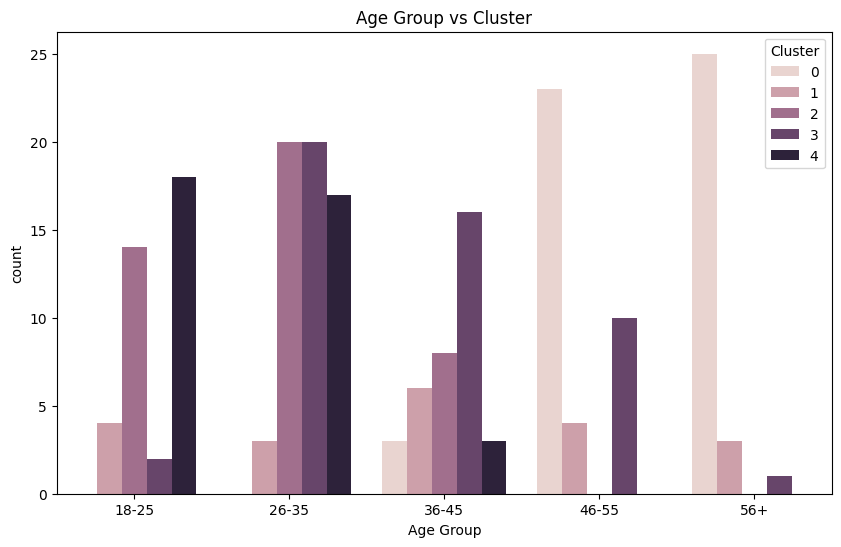

In [30]:
# Step 15: Cluster-wise Age Group Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Age Group', hue='Cluster', data=df)
plt.title("Age Group vs Cluster")
plt.legend(title='Cluster')
plt.show()